# Introduction to classification
Your task in this Lab is to use a linear classification model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set. For each training example, you have the applicant's scores on two exams (Mathematics and English) and the admissions decision. You will build a classification model that predicts if an applicant is likely to be admitted or not based on the scores from those two exams.

We have a file `datasets/university-admission-dataset.csv` that contains the dataset for our classification problem. Complete the code below to load the dataset into a pandas DataFrame called `df`, then display the first 5 rows from it.

In [1]:

import pandas as pd

df = pd.read_csv("datasets/university-admission-dataset.csv")
df[:5]


,math,english,admission
0,34.623660,7.802469,0
1,30.286711,4.389500,0
2,35.847409,7.290220,0
3,60.182599,8.630855,1
4,79.032736,7.534438,1


The first column (called `"math"`) is the score obtained at the mathematics exam, the second column (called `"english"`) is the score obtained at the English exam, and the third column (called `"admission"`) is the class-label indicating if the student has been admitted or not (1 = Admitted, 0 = Not admitted).

Complete the code below to extract the data from the DataFrame `df` into the variables `X` and `y`. The variable `X` is the input data and should be a matrix (two-dimensional array) with two columns (two features) corresponding to the score at math exam and the score at the English exam. The variable `y` (one-dimensional array) contains the output class-labels corresponding to whether or not each student has been admitted. 

In [3]:

X = df[["math", "english"]].values
y = df["admission"].values

print(X.shape)
print(y.shape)


(100, 2)
(100,)


As usual, before applying machine learning, it may be helpful to first visualize the data. Complete the following Python code so that it displays a figure like the one shown below. The two coordinates correspond to the two exam scores (i.e. our features), and the class-labels are shown with different colors and markers.
<img src="imgs/admission.png" width="400px" />

<details>
<summary><b>Click here to get some hint (if needed)</b></summary>

Suppose that we have two numpy arrays `a` and `b` of the same length, as in the following example:
```python
a = np.array(["This", "is", "an", "interesting", "example"])
b = np.array(["yes", "yes", "no", "yes", "no"])
```
To get the elements of `a` where the corresponding value in `b` is `"yes"`, we can simply use `a[b == "yes"]`. Similarly, to get the elements of `a` where the corresponding value in `b` is `"no"`, we can simply use `a[b == "no"]`.
```python
print( a[b == "yes"] ) # This gives: ["This", "is", "interesting"]
print( a[b == "no"] ) # This gives: ["an", "example"]
```
You can use this syntax to select a subset of data-points (from `X`) where the corresponding label (in `y`) is 0 or 1.

</details>

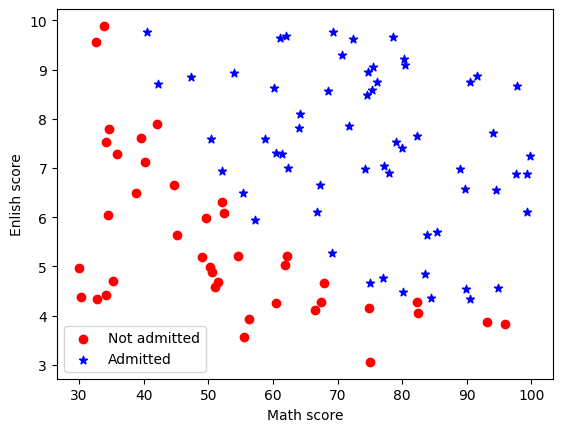

In [4]:
import matplotlib.pylab as plt

# TODO: select the data-points from X whose corresponding class-label is 0 (not admitted).
X0 = X[y == 0]

# TODO: select the data-points from X whose corresponding class-label is 1 (admitted).
X1 = X[y == 1]

plt.scatter(X0[:, 0], X0[:, 1], color="red", marker="o", label="Not admitted")
plt.scatter(X1[:, 0], X1[:, 1], color="blue", marker="*", label="Admitted")
plt.legend()
plt.ylabel("Enlish score")
plt.xlabel("Math score")
plt.show()

Notice that the scores of the two exams (the two features) have different scales. Indeed, the scores of the math exam (feature 0) are $\in [0, 100]$, while the scores of the English exam (feature 1) are $\in [0, 10]$. This difference can be problematic depending on that machine learning method we use. To be safe, it's often a good idea to normalize the data before using machine learning.
Complete the code below to transform the data (using `MinMaxScaler`) so that all features have the same scale.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

# TODO: transform X so that all features are scale properly
X_scaled = scaler.transform(X)


Next, you will use scikit-learn to perform classification on the previous data. Complete the code below to train a linear classification model called `RidgeClassifier`.

In [6]:
""" TODO:
Complete the code to train the LinearRegression model 
using the training dataset (input data X_scaled and output y).
"""

from sklearn.linear_model import RidgeClassifier

clf_model = RidgeClassifier()  # Creating the RidgeClassifier model (untrained)
# TODO: train the clf_model using the training dataset (X_scaled, y)
clf_model.fit(X_scaled, y)


RidgeClassifier()

You can run the cell below to plot the decision boundary of the trained model. This plot is done using a function `plot_decision_boundary(X_scaled, y, clf_model)` that we provide (you do **not** need to understand how this function works).

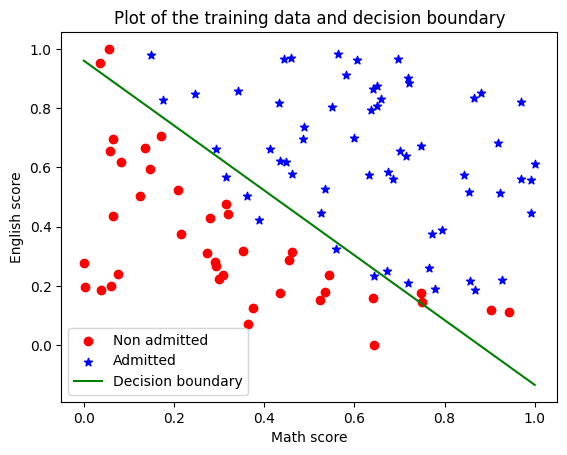

In [7]:
from datasets.utils import plot_linear_decision_boundary
plot_linear_decision_boundary(X_scaled, y, clf_model)

Finally, use your trained classification model to predict whether four new students will be admitted or not. The exam scores obtained by these four students are provided in the table below (which corresponds to the variable `X_test` in the code).<br>
Note: do not forget to also scale the new test data using `scaler.transform(...)`, before making predictions.

| Mathematics | English     |
| :---:       |    :----:   |
| 45          | 8.5         |
| 60          | 5           |
| 90          | 6           |
| 88          | 3           |

In [8]:
""" TODO:
Complete the code to predict the admission outcome for the four students listed above.
"""

# TODO: Create a matrix X_test with the data from the four students
import numpy as np
X_test = np.array([
    [45, 8.5], 
    [60, 5], 
    [90, 6], 
    [88, 3], 
])

# TODO: transform the new data X_test
X_test_scaled = scaler.transform(X_test)

# TODO: predict whether each of these students will be admitted or not
y_pred = clf_model.predict(X_test_scaled)
for index in y_pred:
    if index == 1:
        print(f"Student nr {index} is likely to be admitted")
    else:
        print(f"Student nr {index} is not likely to be admitted")

Student nr 1 is likely to be admitted
Student nr 0 is not likely to be admitted
Student nr 1 is likely to be admitted
Student nr 0 is not likely to be admitted


## Optional: repeating the same steps on another dataset

The remaining part of the lab is optional. You are free to do it (to practice and learn more) or not. The goal is simply to repeat the same steps as previously using another dataset (microchips) and another classifier (KNeighborsClassifier).

With this dataset (`datasets/microchips-dataset.csv`), the task is to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a classifier.

The first column in the dataset corresponds to the result of `"microchip test 1"`, the second column corresponds to the result of `"microchip test 2"`, and the third column (called `"acceptance"`) is the class-label indicating if the microchip has been accepted or rejected (1 = Accepted, 0 = Rejected).

Follow the *TODOs* below to repeat the same process as previously:

In [9]:
# TODO: load the dataset "datasets/microchips-dataset.csv" into a pandas DataFrame called df
df = pd.read_csv("datasets/microchips-dataset.csv")
print(df)
# TODO: extract the data from df into a matrix X (two features: ["microchip test 1", "microchip test 2"])
X = df[["microchip test 1", "microchip test 2"]].values

# TODO: extract the class-labels from df into as an array y (column "acceptance")
y =  df["acceptance"]

     microchip test 1  microchip test 2  acceptance
0            0.051267          0.699560           1
1           -0.092742          0.684940           1
2           -0.213710          0.692250           1
3           -0.375000          0.502190           1
4           -0.513250          0.465640           1
..                ...               ...         ...
113         -0.720620          0.538740           0
114         -0.593890          0.494880           0
115         -0.484450          0.999270           0
116         -0.006336          0.999270           0
117          0.632650         -0.030612           0

[118 rows x 3 columns]


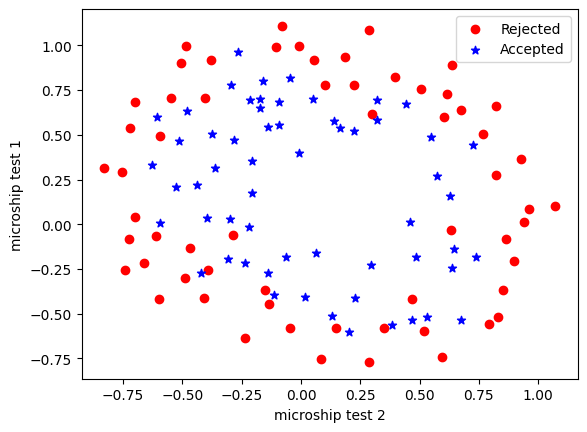

In [10]:
# TODO: Plot the data as you did earlier. Use different colors and markers for the different classes.
X0 = X[y == 0]
X1 = X[y == 1]
plt.scatter(X0[:, 0], X0[:, 1], color="red", marker="o", label="Rejected")
plt.scatter(X1[:, 0], X1[:, 1], color="blue", marker="*", label="Accepted")
plt.legend()
plt.ylabel("microship test 1")
plt.xlabel("microship test 2")
plt.show()

After plotting the data, notice that:
- We do not need to scale/normalize the data in this case since the two features have the same scale.
- The classes can not be correctly separated with a linear model. That's why we will use a nonlinear model (e.g. `KNeighborsClassifier`).

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()
# TODO: train the kn_model using the training dataset (X, y)
kn_model.fit(X, y)


KNeighborsClassifier()

Please wait. This might take few seconds to plot ...


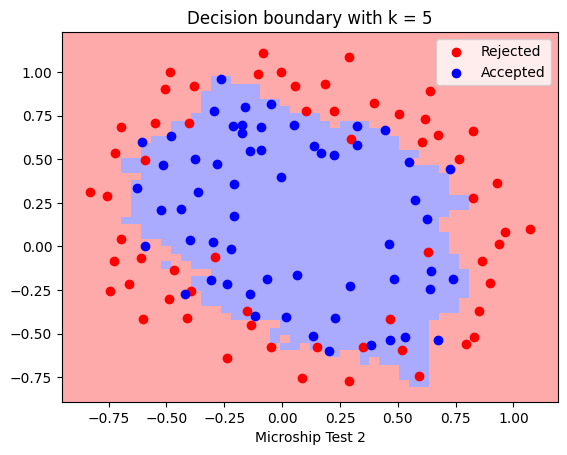

In [12]:
from datasets.utils import plot_kn_decision_boundary
plot_kn_decision_boundary(X, y, kn_model)

In [13]:
# You are given the tests results for three new microships
X_test = np.array([
    [-0.75, 1.0], 
    [-0.10, 0.5], 
    [ 0.25, 0.0], 
])

# TODO: use the kn_model to predict whether each of these three microships should be accepted (1) or rejected (0)
prediction = kn_model.predict(X_test)
for index in prediction:
    if index == 1:
        print(f"Chip nr {index} will be accepted")
    else:
        print(f"Chip nr {index} will not be accepted")



Chip nr 0 will not be accepted
Chip nr 1 will be accepted
Chip nr 1 will be accepted
